In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from datetime import date
from datetime import timedelta

In [2]:
#TOP_DIR = r'/Users/bichama1/Documents/homework/stats'
TOP_DIR = r'C:\Users\changc2\Documents\School\Statistical Methods for CS\data_challenge'
GRAIN_IMPORTS_IN_DIR = r'grain_exports'
SOYBEAN_PRICE_IN_DIR = r'global_soybean_prices'

In [3]:
grain_exports_csvs = glob.glob(os.path.join(TOP_DIR, GRAIN_IMPORTS_IN_DIR, '*.csv'))
soybean_price_csv = os.path.join(TOP_DIR, SOYBEAN_PRICE_IN_DIR, 'PSOYBUSDM.csv')
new_orleans_prices_csv = os.path.join(TOP_DIR, SOYBEAN_PRICE_IN_DIR, 'NO_Port_Soybean_Prices.csv')
paranagua_prices_csv = os.path.join(TOP_DIR, SOYBEAN_PRICE_IN_DIR, 'PR_Port_Soybean_Prices.csv')

C:\Users\changc2\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,55,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\changc2\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\changc2\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\changc2\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (55) have mixed types. Specify dtype optio

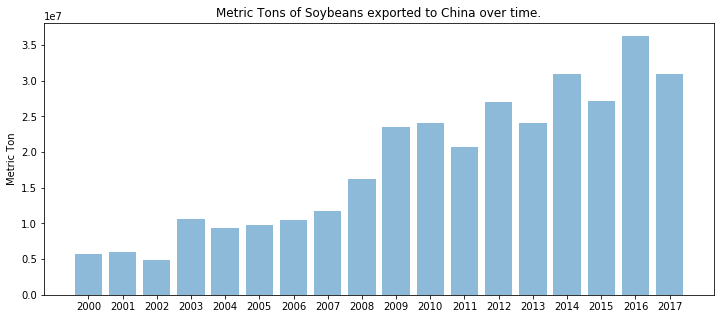

In [4]:
destination = 'CHINA MAIN'
grain = 'SOYBEANS'
exports_dataset = {}
for export_csv in grain_exports_csvs:
    year = int(os.path.basename(export_csv).replace('CY','').replace('.csv',''))
    data = pd.read_csv(export_csv)
    data = data[data['Grain'] == grain]
    data = data[data['Destination'] == destination]
    exports_dataset[year] = data
    
total_exports = []
years = sorted(exports_dataset.keys())
for year in years:
    total_exports.append(exports_dataset[year]['Metric Ton'].sum())

y_pos = np.arange(len(years))
plt.figure(figsize=(12,5))
plt.bar(y_pos, total_exports, align='center', alpha=0.5)
plt.xticks(y_pos, years)
plt.ylabel('Metric Ton')
plt.title('Metric Tons of Soybeans exported to China over time.')
plt.show()

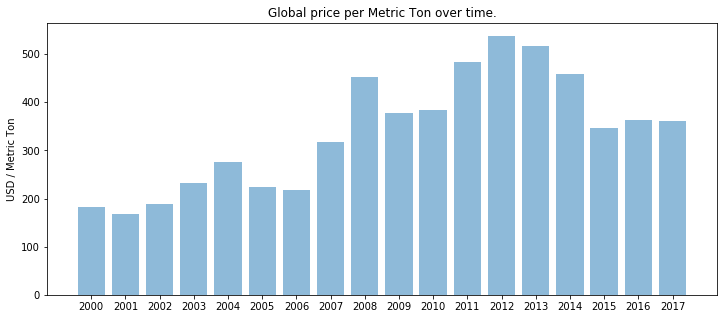

In [5]:
prices_dataset = pd.read_csv(soybean_price_csv)
prices_dataset['DATE'] = prices_dataset['DATE'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d').date())

average_prices = []

for year in years:
    begin_date = date(year, 1, 1)
    end_date = date(year+1, 1, 1)
    prices_for_year = prices_dataset[(prices_dataset['DATE'] >= begin_date) & (prices_dataset['DATE'] < end_date)]
    average_price_for_year = prices_for_year['PSOYBUSDM'].mean()
    average_prices.append(average_price_for_year)
    

y_pos = np.arange(len(years))
plt.figure(figsize=(12,5))
plt.bar(y_pos, average_prices, align='center', alpha=0.5)
plt.xticks(y_pos, years)
plt.ylabel('USD / Metric Ton')
plt.title('Global price per Metric Ton over time.')
plt.show()

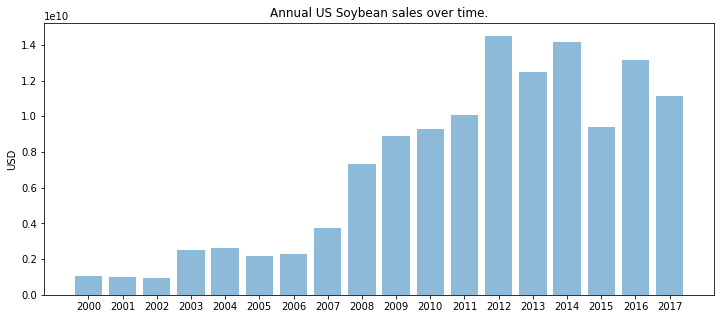

In [6]:
annual_sales = [price*tons for price,tons in zip(average_prices, total_exports)]

y_pos = np.arange(len(years))
plt.figure(figsize=(12,5))
plt.bar(y_pos, annual_sales, align='center', alpha=0.5)
plt.xticks(y_pos, years)
plt.ylabel('USD')
plt.title('Annual US Soybean sales over time.')
plt.show()

In [7]:
no_prices_dataset = pd.read_csv(new_orleans_prices_csv)
no_prices_dataset['DATE'] = no_prices_dataset['DATE'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d').date())

pr_prices_dataset = pd.read_csv(paranagua_prices_csv)
pr_prices_dataset['DATE'] = pr_prices_dataset['DATE'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y').date())

years = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
BUSHELS_PER_TON = 36.74

average_price_for_pr_month = []
average_price_for_no_month = []
dates = []
for year in years:
    for month in months:
        begin_date = date(year, month, 1)
        if month == 12:
            end_date = date(year+1, 1, 1)
        else:
            end_date = date(year, month+1, 1)
        price_for_month_pr = pr_prices_dataset[(pr_prices_dataset['DATE'] >= begin_date) & (pr_prices_dataset['DATE'] < end_date)]
        average_price_for_month_pr = price_for_month_pr['PRICE_BUSHEL'].mean()*BUSHELS_PER_TON
        average_price_for_pr_month.append(average_price_for_month_pr)
        
        price_for_month_no = no_prices_dataset[(no_prices_dataset['DATE'] >= begin_date) & (no_prices_dataset['DATE'] < end_date)]
        average_price_for_month_no = price_for_month_no['PRICE'].mean()*BUSHELS_PER_TON
        average_price_for_no_month.append(average_price_for_month_no)
        
        dates.append(begin_date)

df = pd.DataFrame({'PR':average_price_for_pr_month, 'NO': average_price_for_no_month}, index = pd.Series(dates))
df = df[(df['NO'].notnull()) & (df['PR'].notnull())]

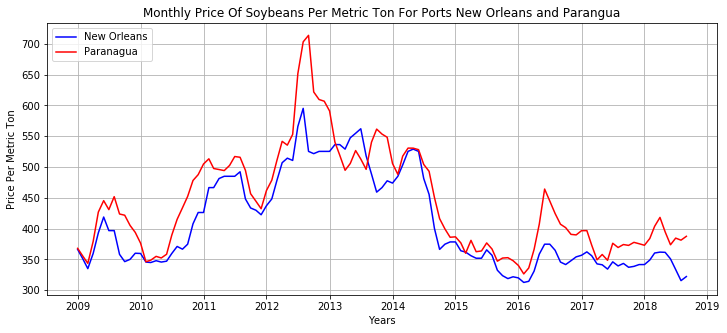

In [11]:
plt.figure(figsize=(12,5))

ax1 = df.NO.plot(color='blue', grid=True, label='New Orleans')
ax2 = df.PR.plot(color='red', grid=True, secondary_y=False, label='Paranagua')

h1, l1 = ax1.get_legend_handles_labels()

plt.legend(h1, l1, loc=2)
plt.xlabel('Years')
plt.ylabel('Price Per Metric Ton')
plt.title('Monthly Price Of Soybeans Per Metric Ton For Ports New Orleans and Parangua')
plt.show()
